#### 퍼셉트론 실행 예

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), 
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.xlabel('꽃받침의 길이')
    plt.ylabel('꽃받침의 폭')
    plt.title('붓꽃 데이터 (setosa/virginica)')
    plt.show()

from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

C:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


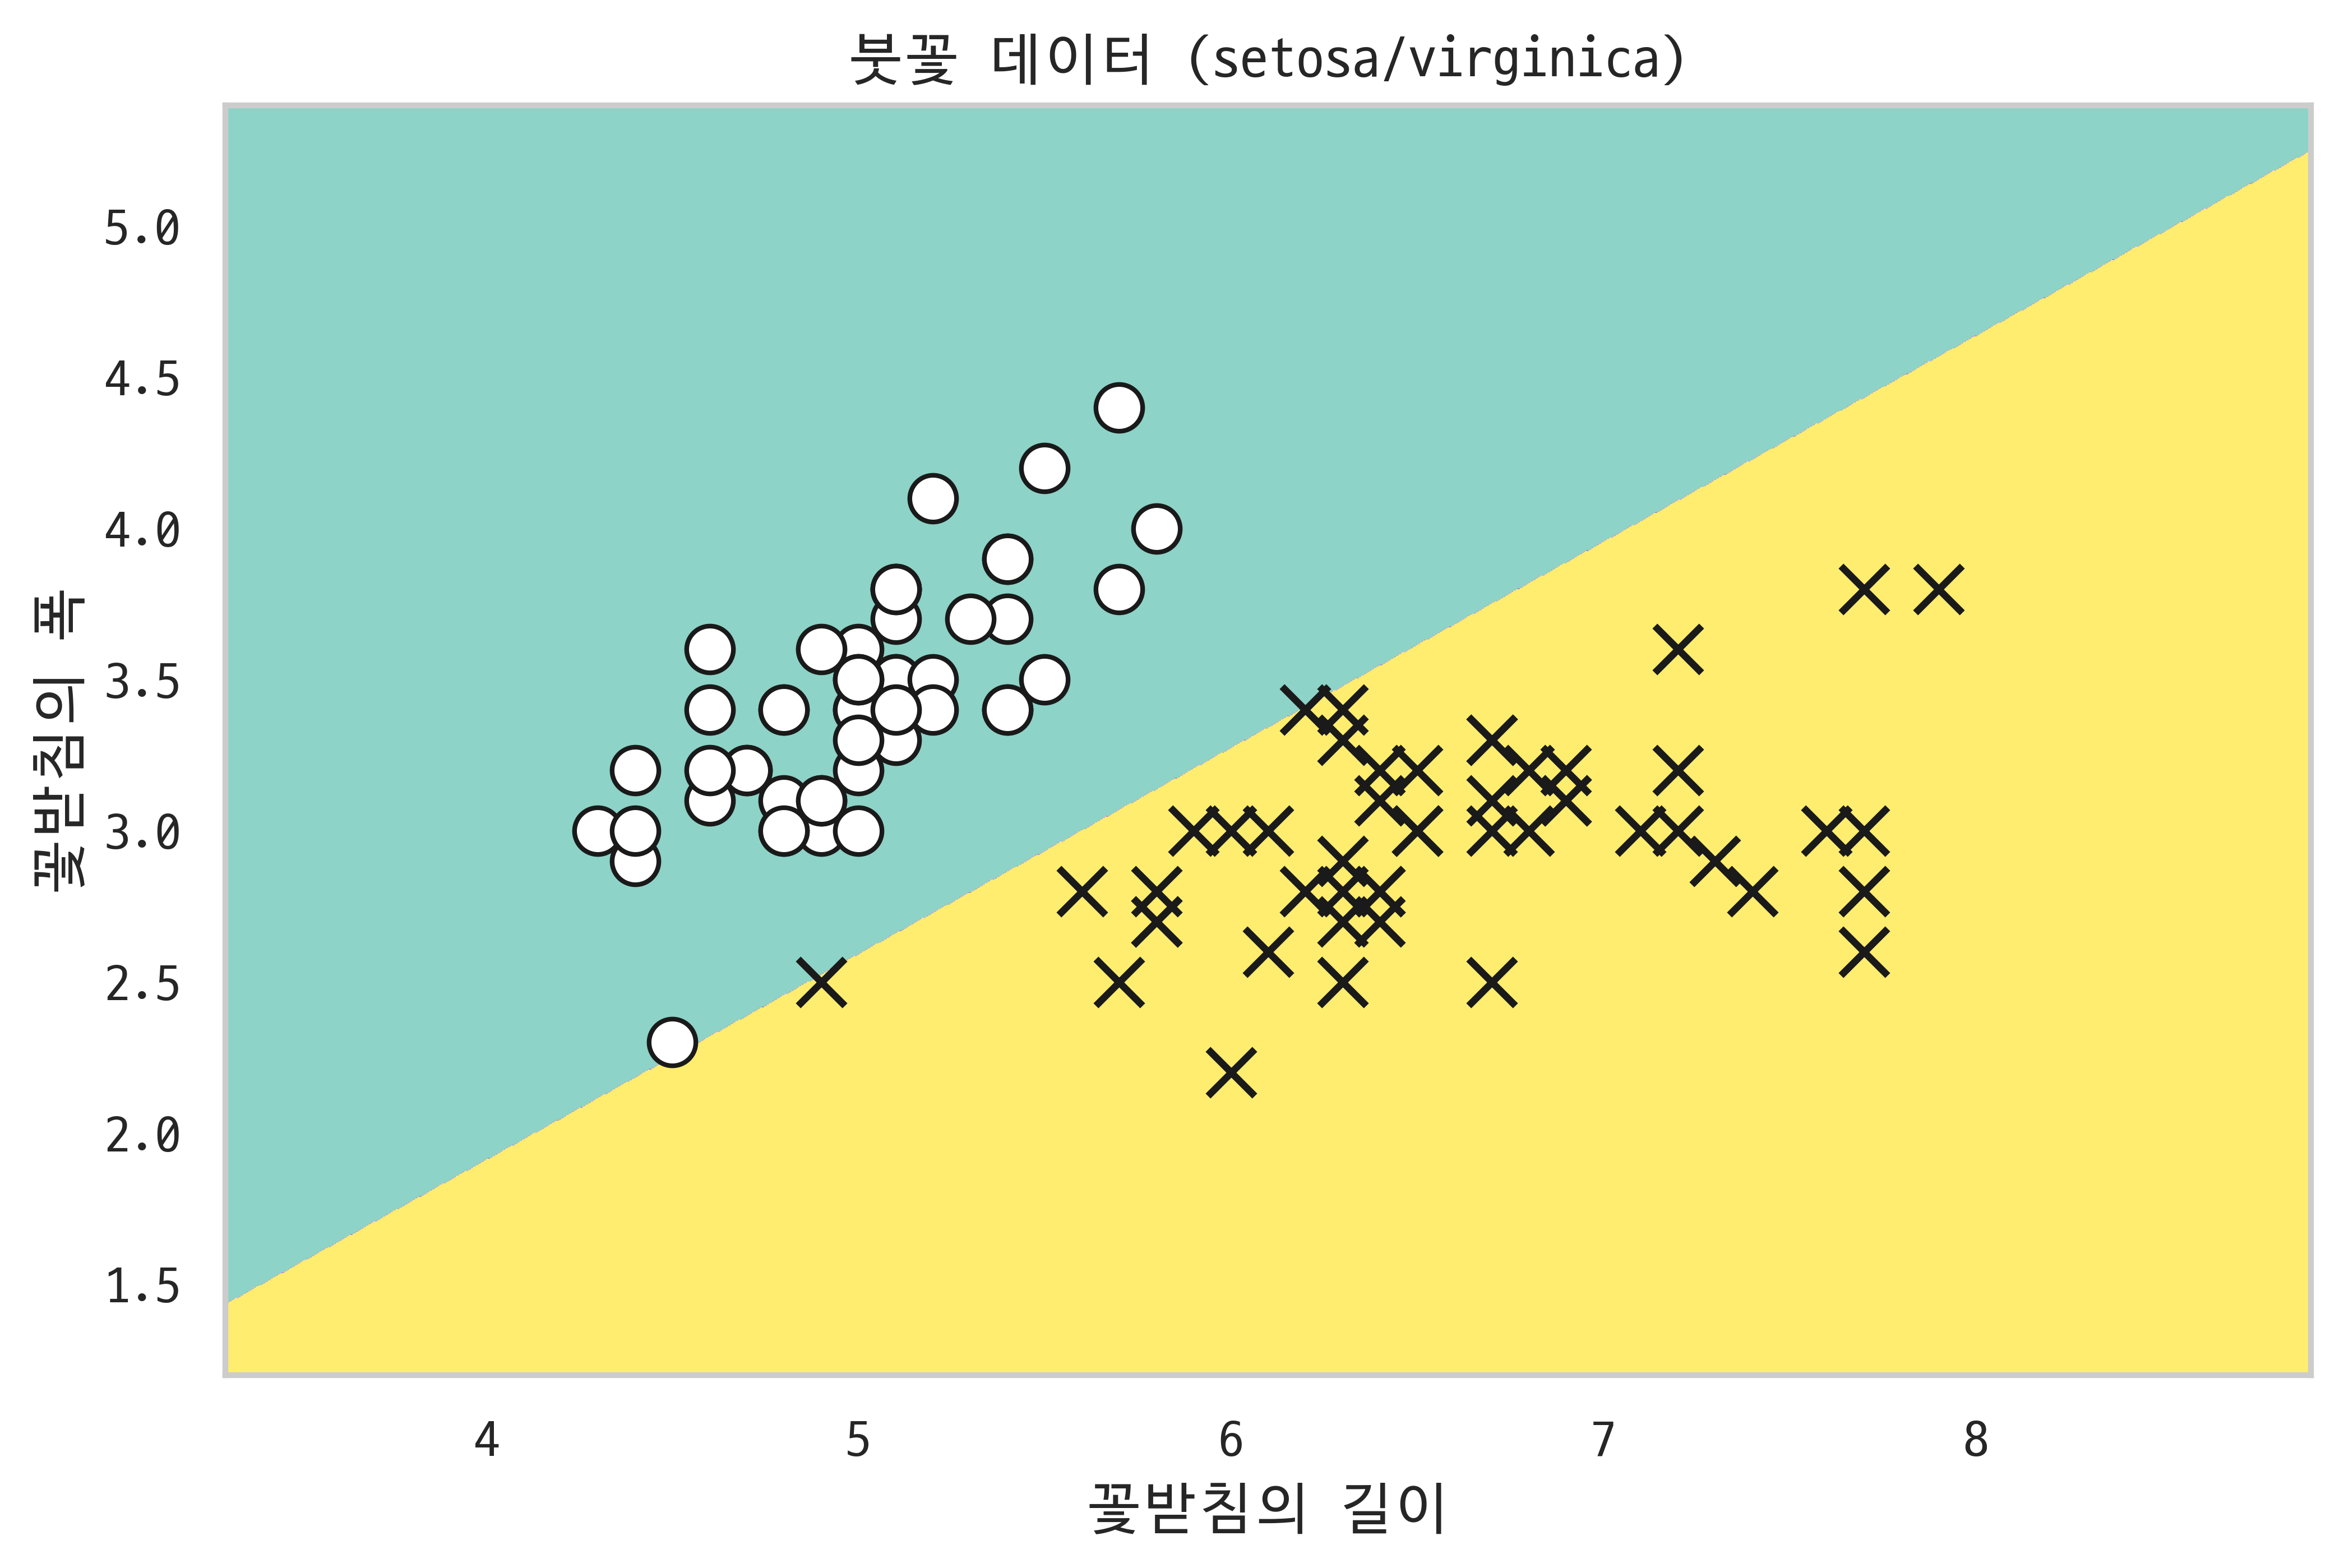

In [2]:
plot_perceptron(300)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[50,  0],
       [ 0, 50]], dtype=int64)

#### 학습 성능

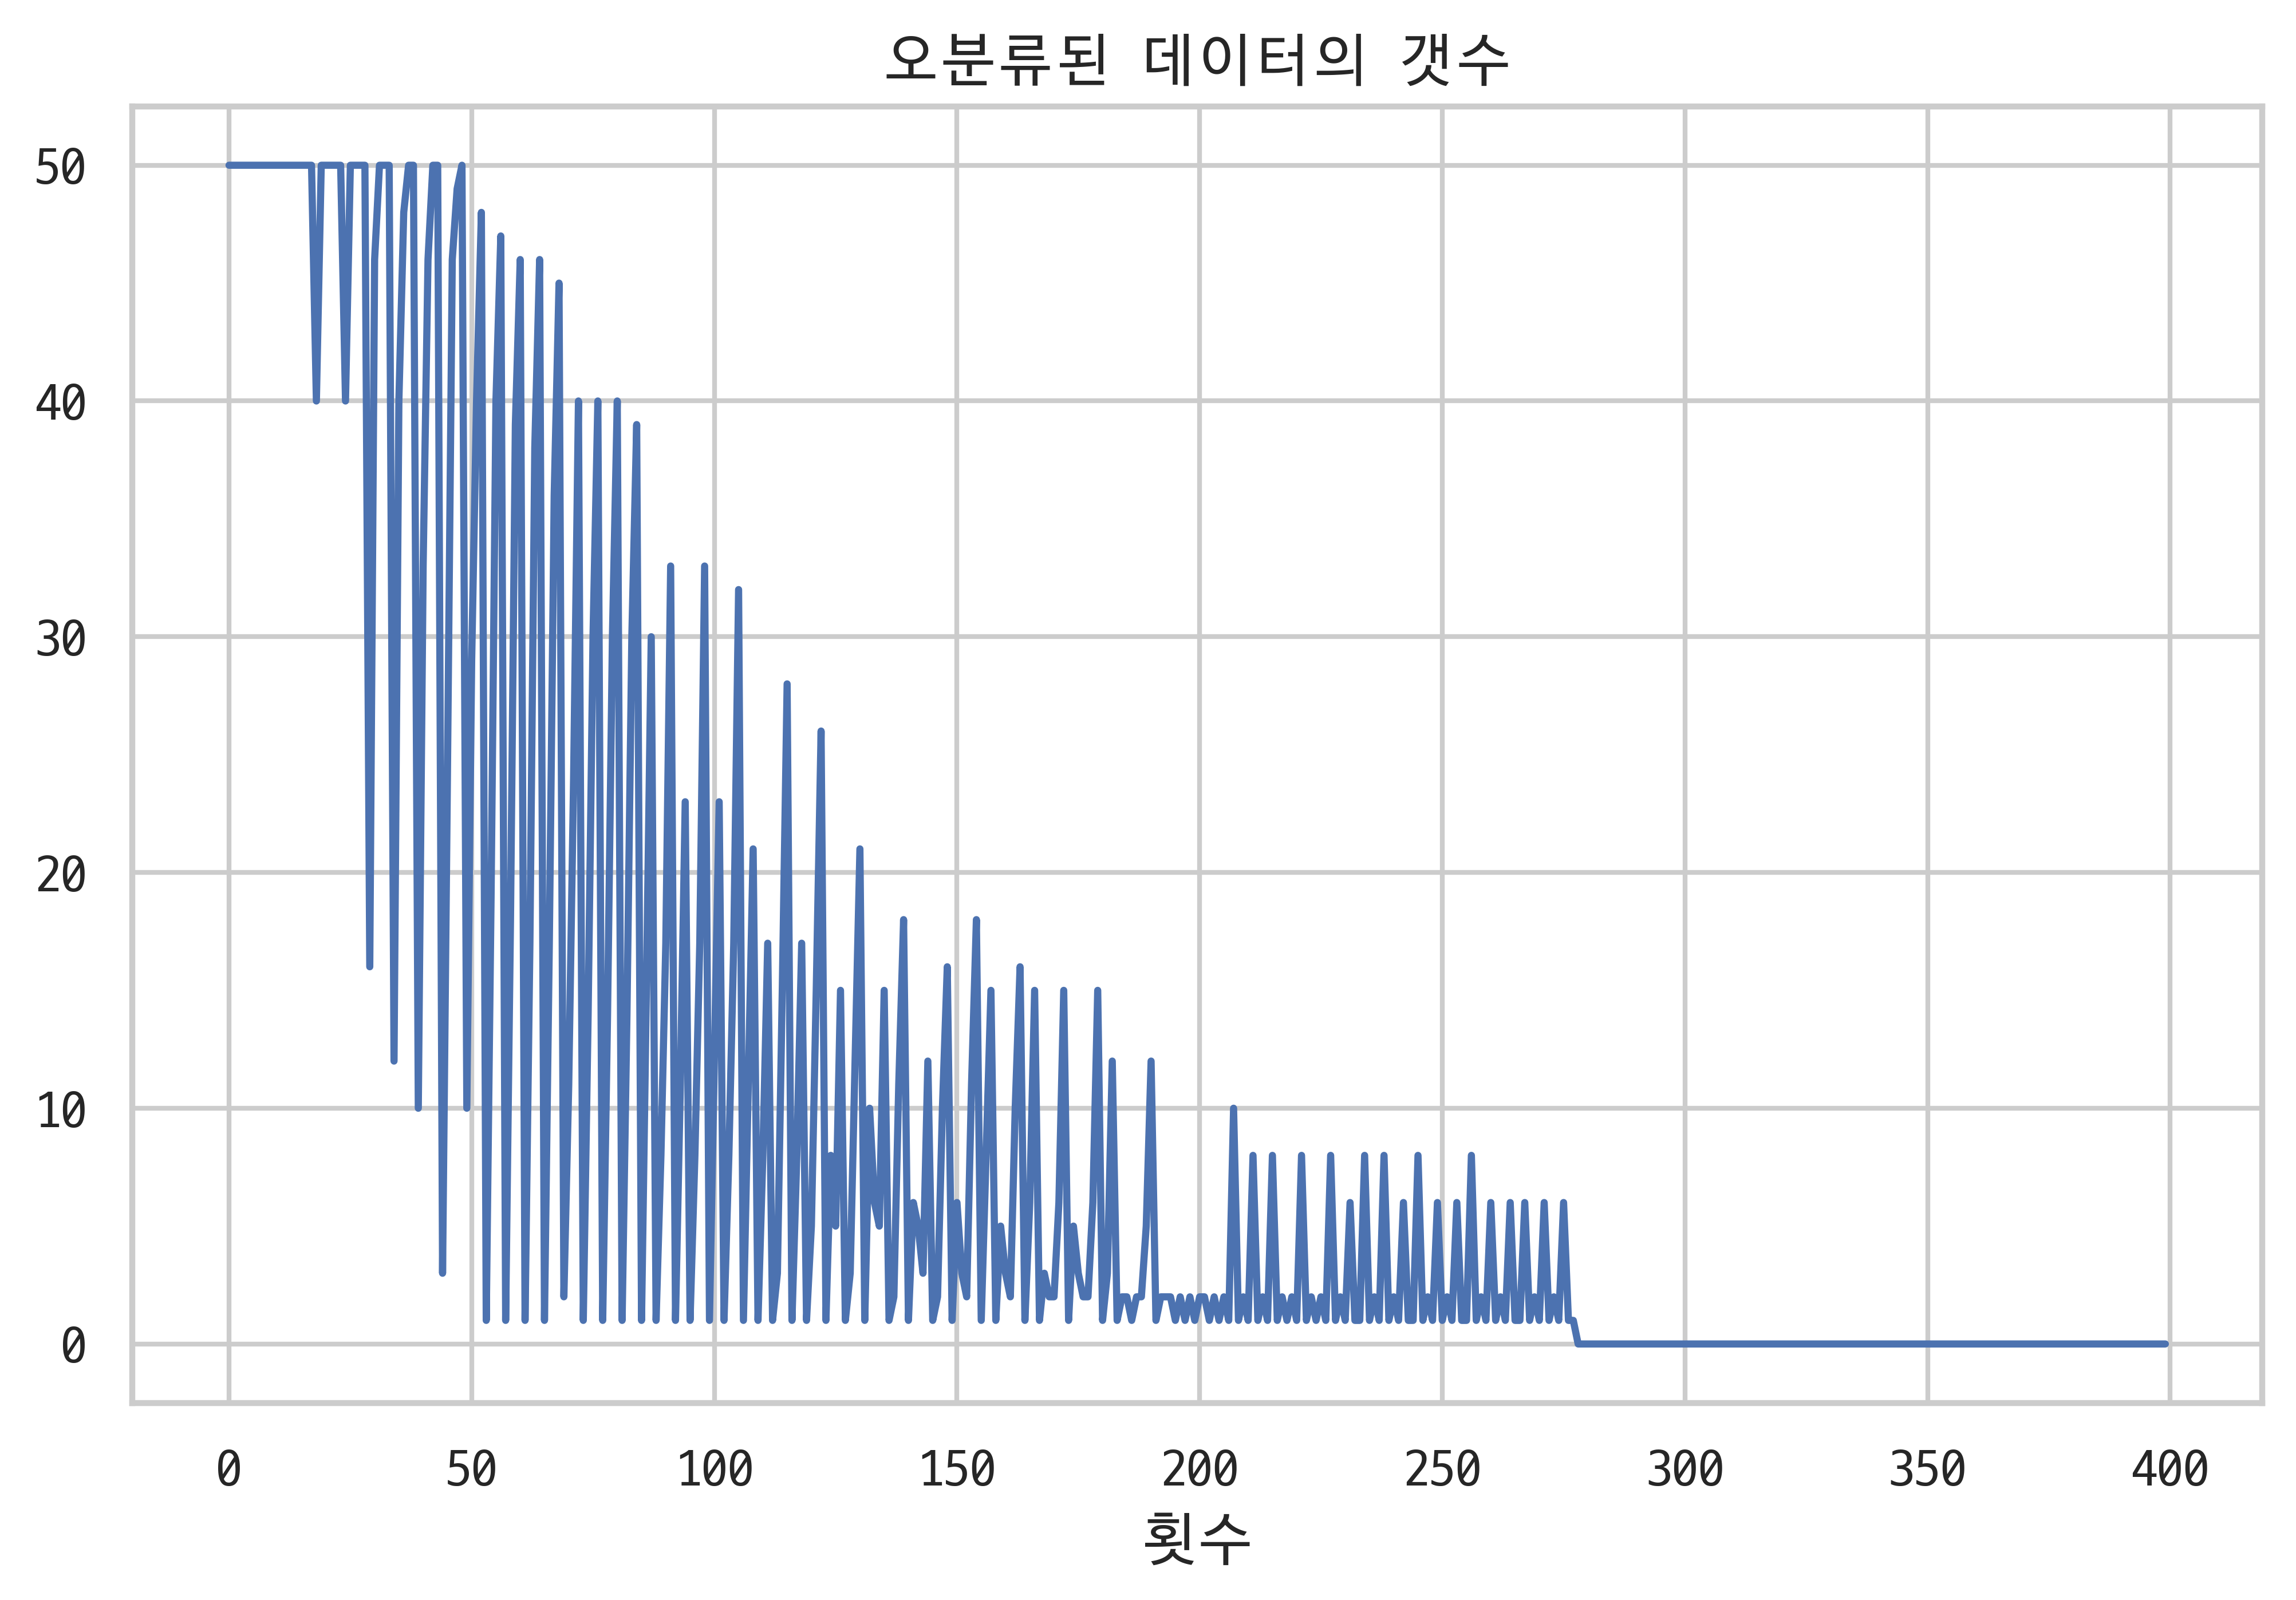

In [4]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel('횟수')
plt.title('오분류된 데이터의 갯수')
plt.show()

#### SGD

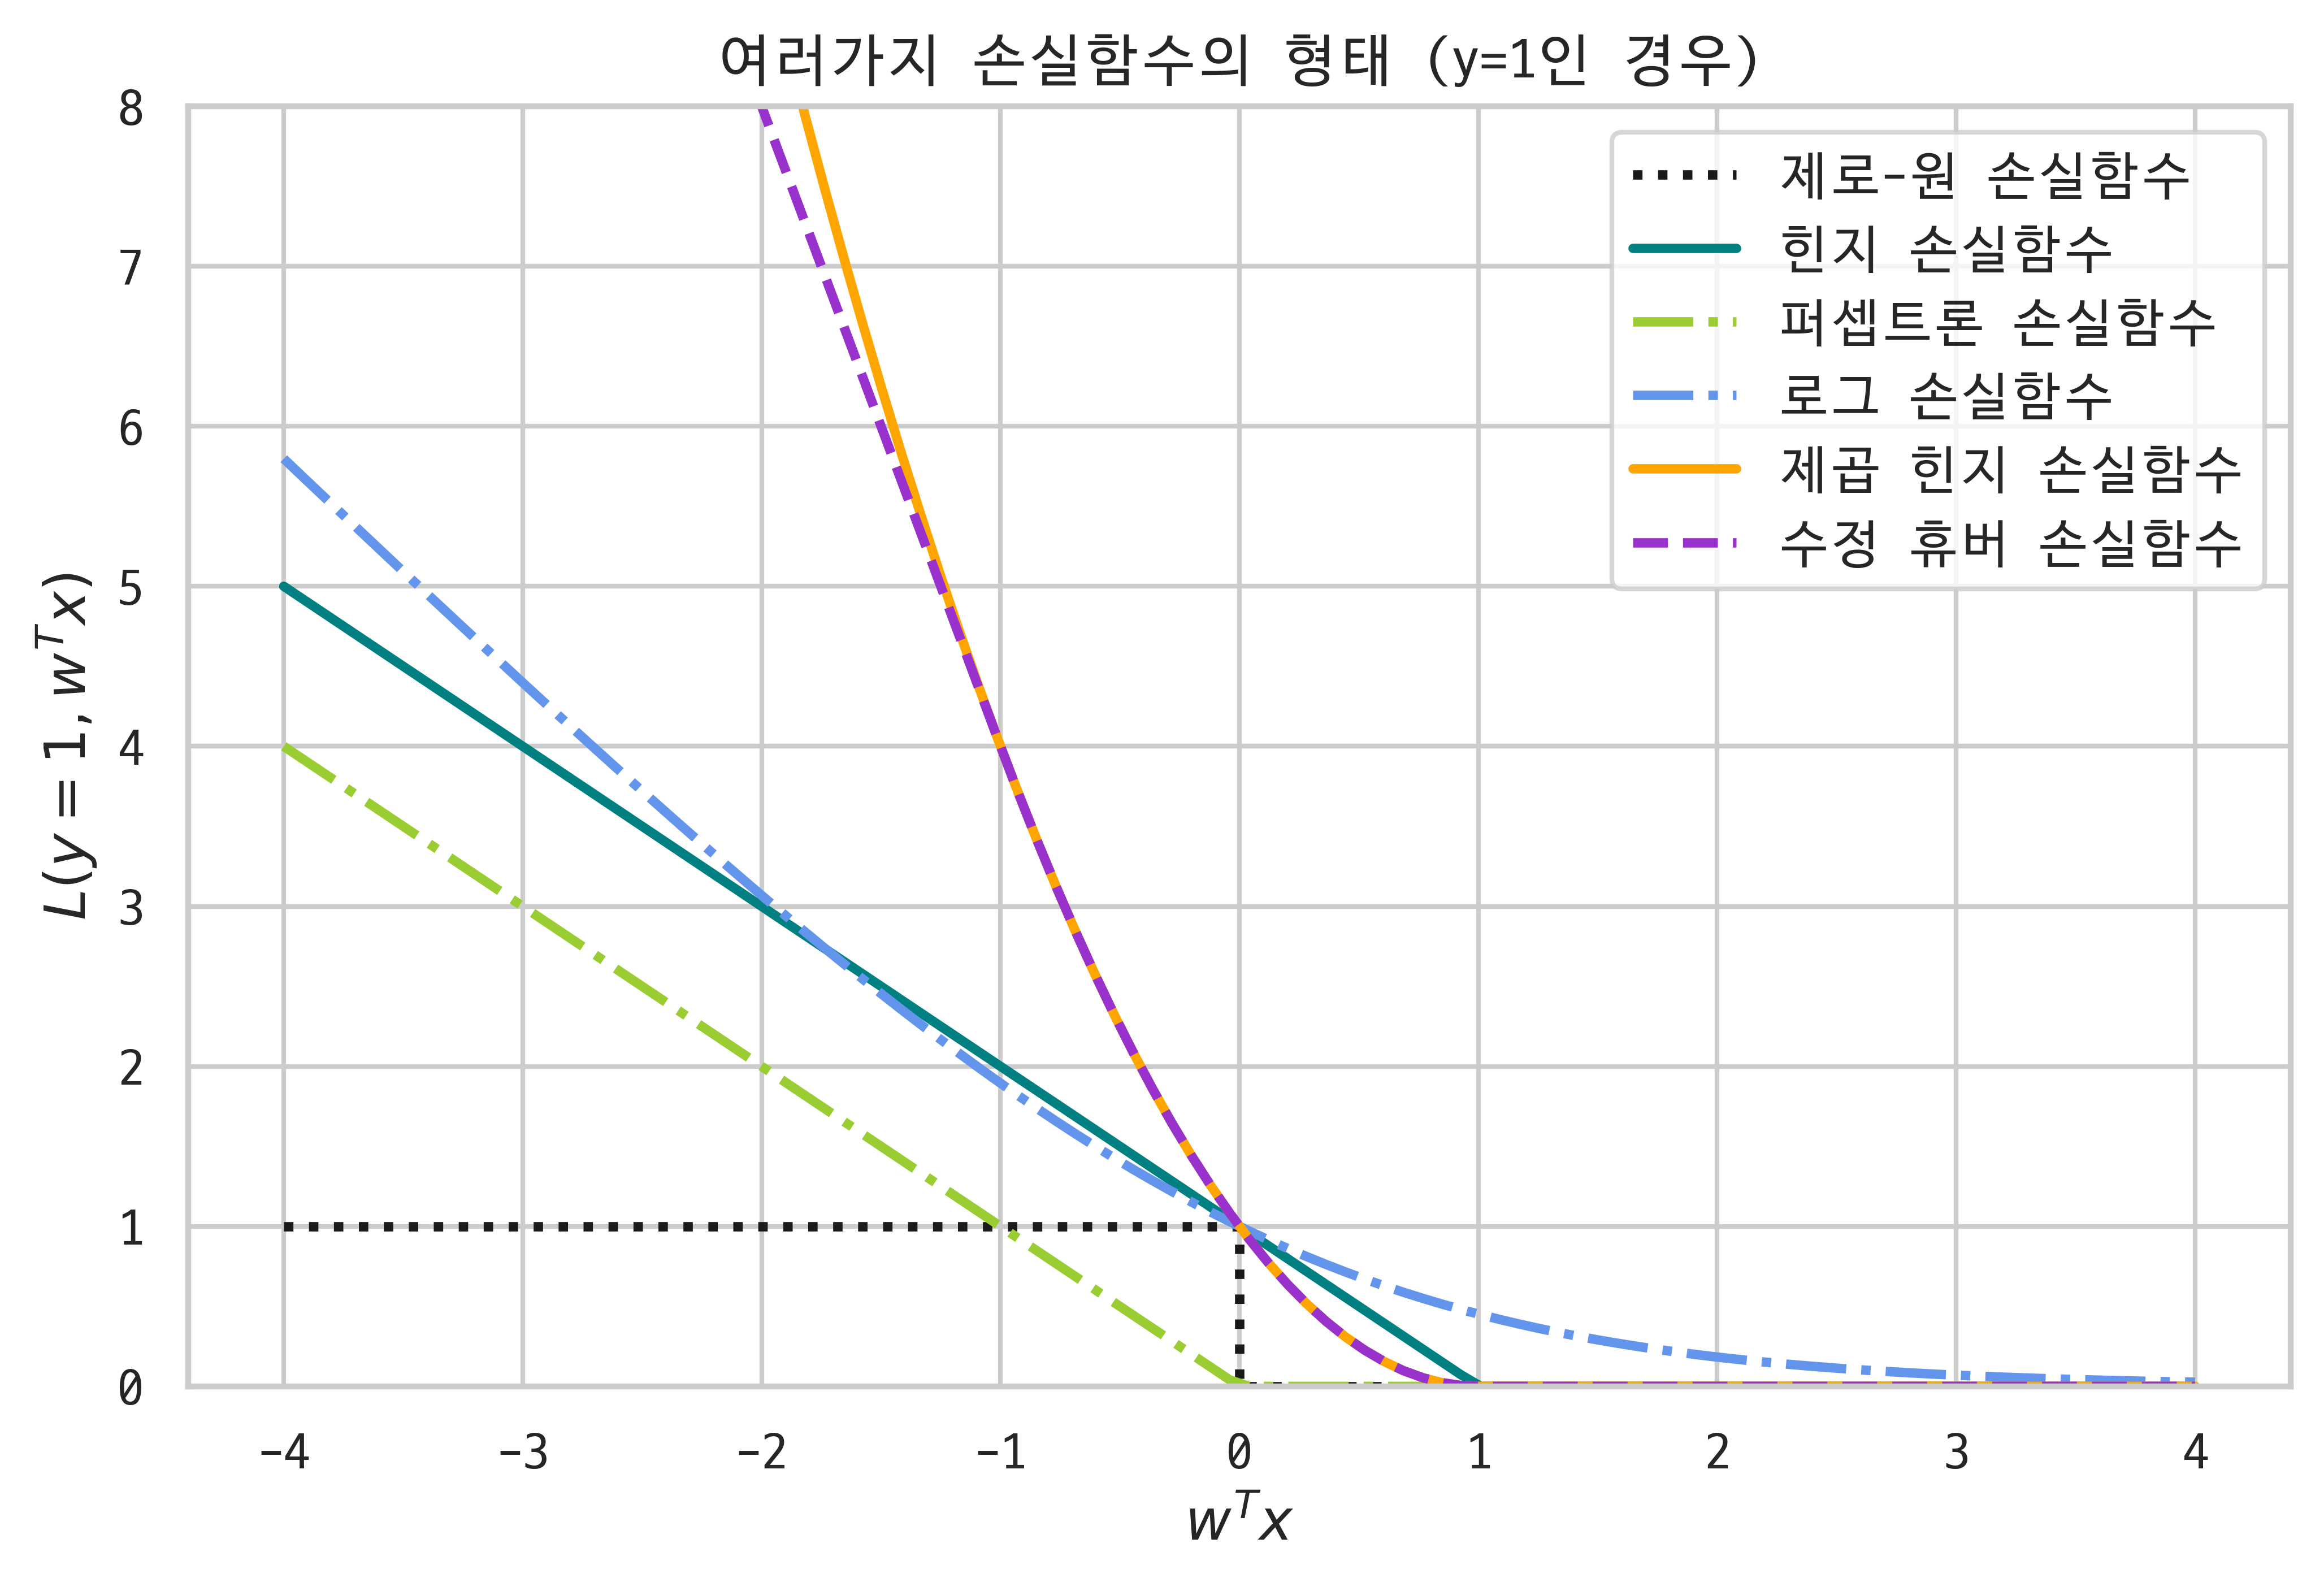

In [10]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1])**2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=':', label='제로-원 손실함수')
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=2, ls='-', label='힌지 손실함수')
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=2, ls='-.', label='퍼셉트론 손실함수')
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, ls='-.', label='로그 손실함수')
plt.plot(xx, np.where(xx < 1, 1 - xx, 0)**2, color='orange', lw=2, ls='-', label='제곱 힌지 손실함수')
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label='수정 휴버 손실함수')
plt.ylim((0, 8))
plt.legend(loc='upper right')
plt.xlabel(r'$w^Tx$')
plt.ylabel(r'$L(y=1, w^Tx)$')
plt.title('여러가지 손실함수의 형태 (y=1인 경우)')
plt.show()

#### Scikit-Learn의 SGD 구현

In [5]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    model = SGDClassifier(loss='modified_huber', max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), 
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette('Set2'))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.xlabel('꽃받침의 길이')
    plt.ylabel('꽃받침의 폭')
    plt.title('붓꽃 데이터 (setosa/virginica)')
    plt.show()

from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

C:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


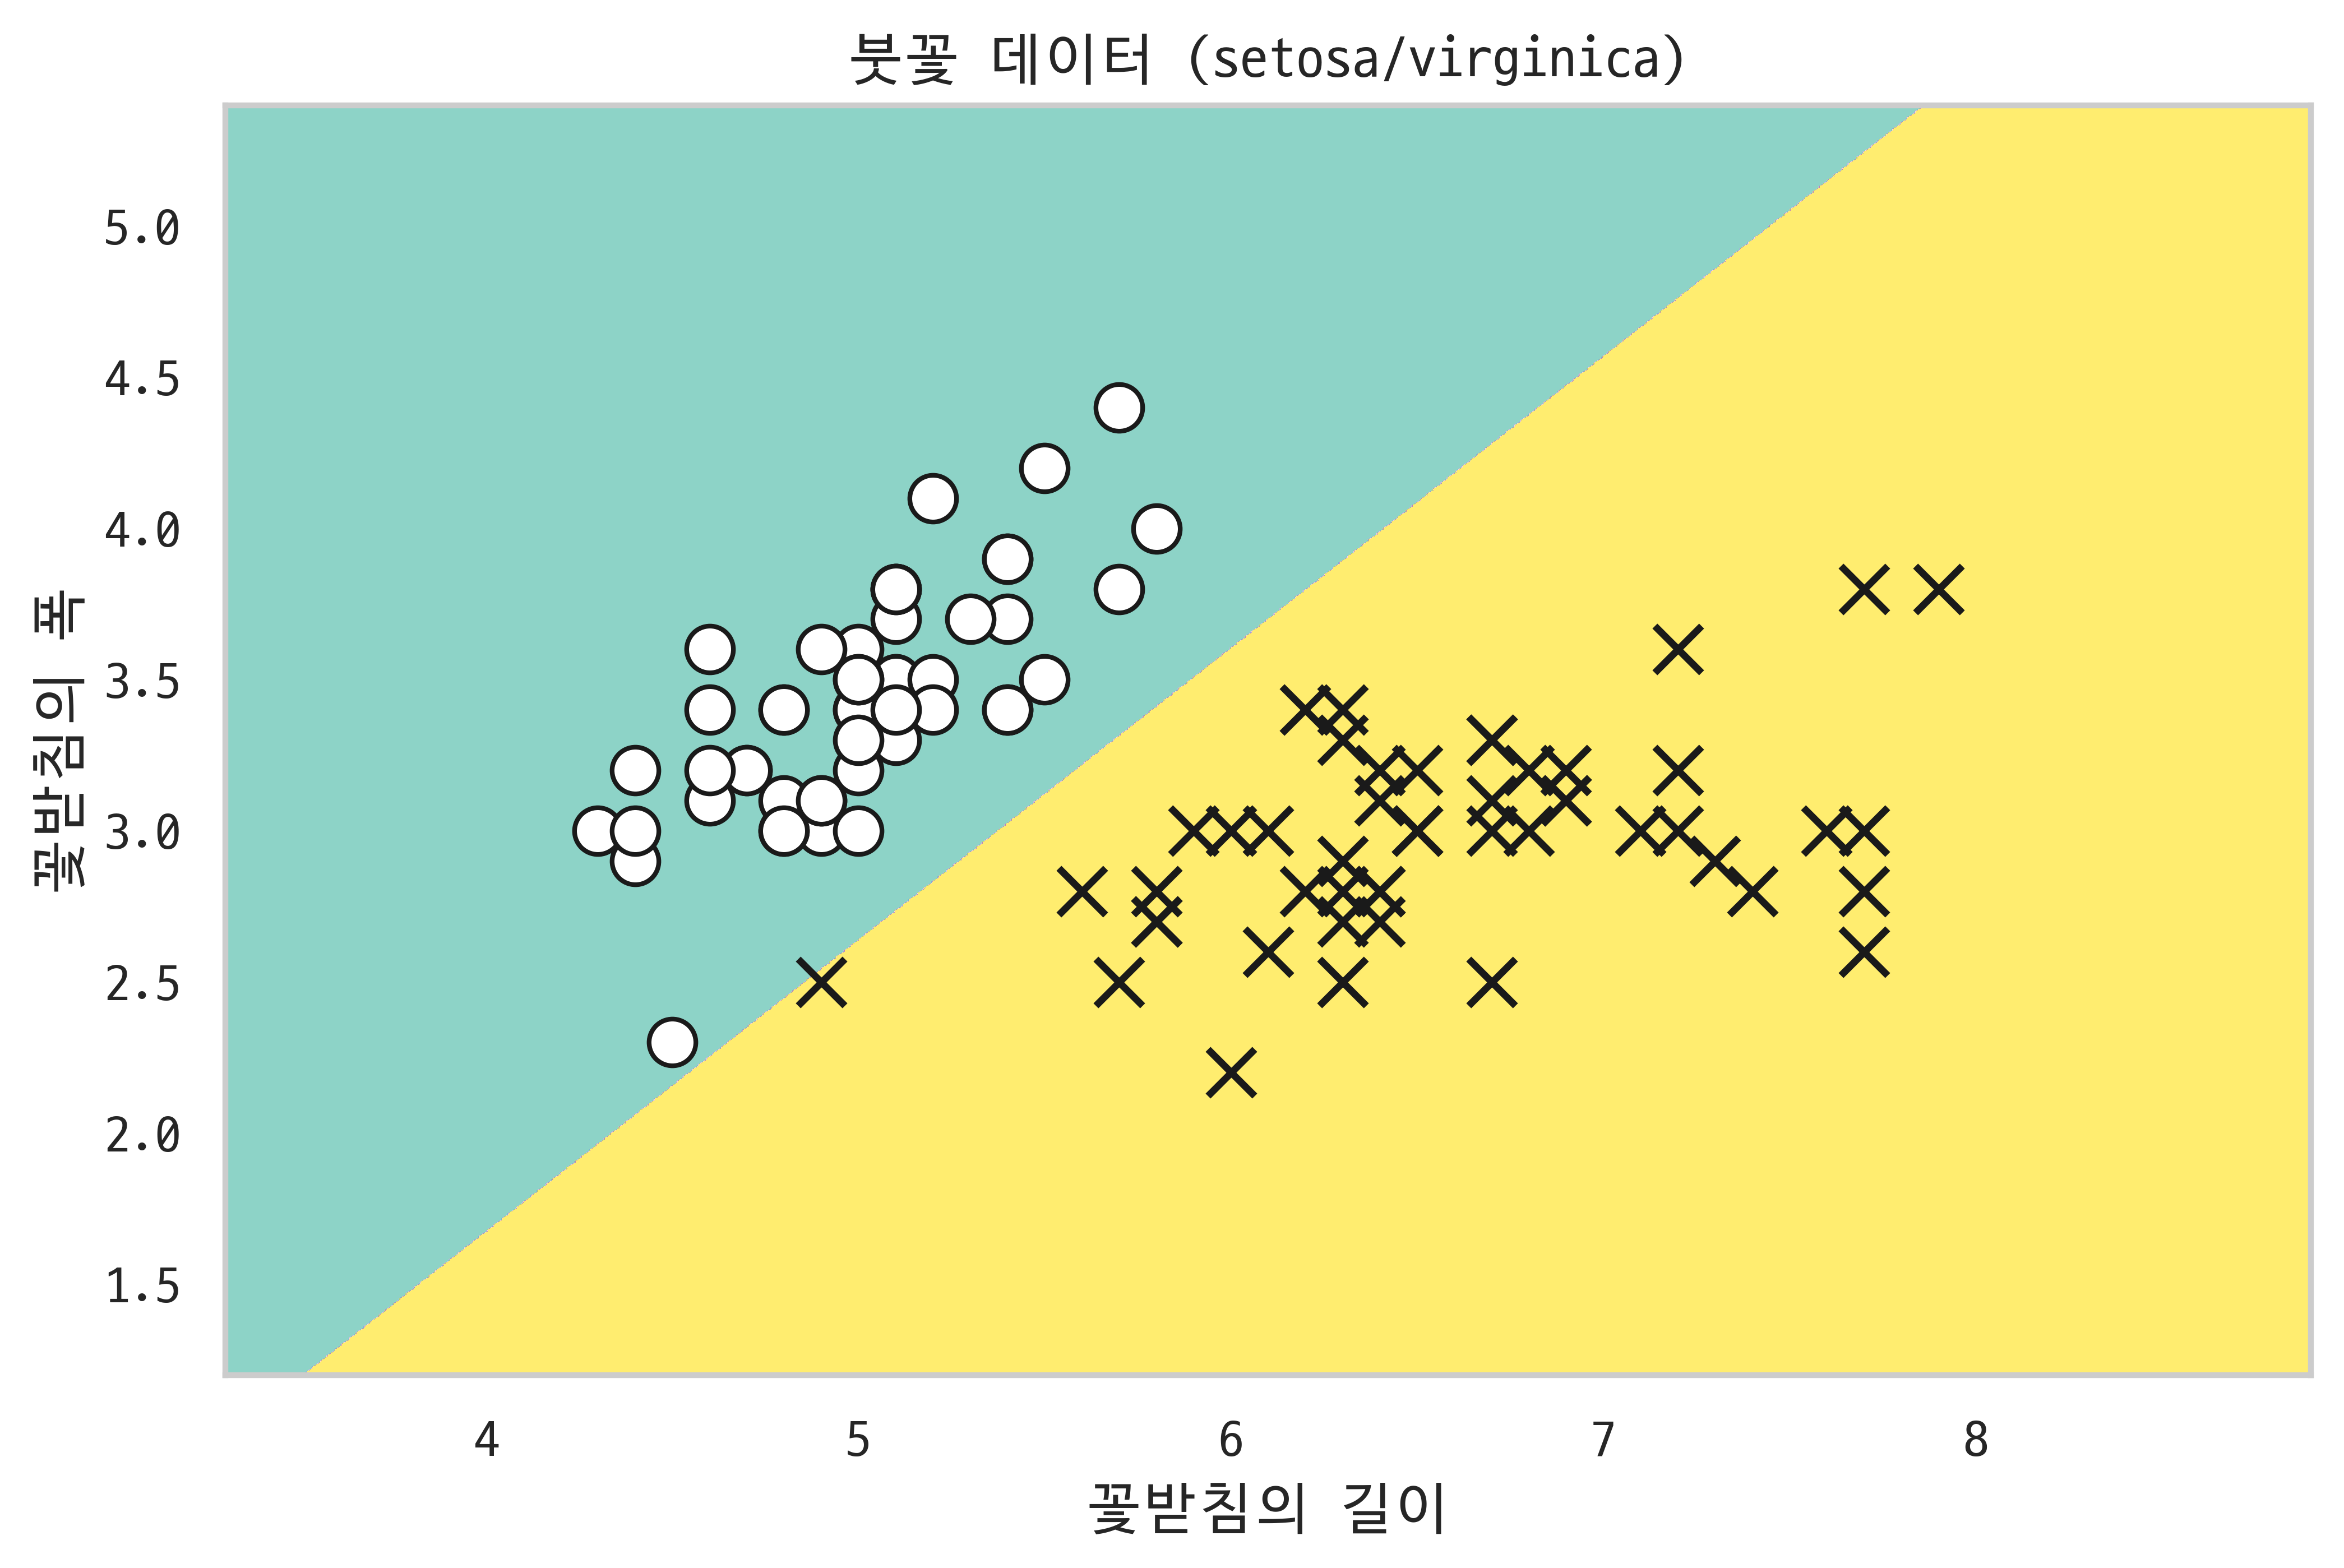

In [6]:
plot_sgd(400)

In [7]:
model = SGDClassifier(loss='modified_huber', max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[50,  0],
       [ 0, 50]], dtype=int64)

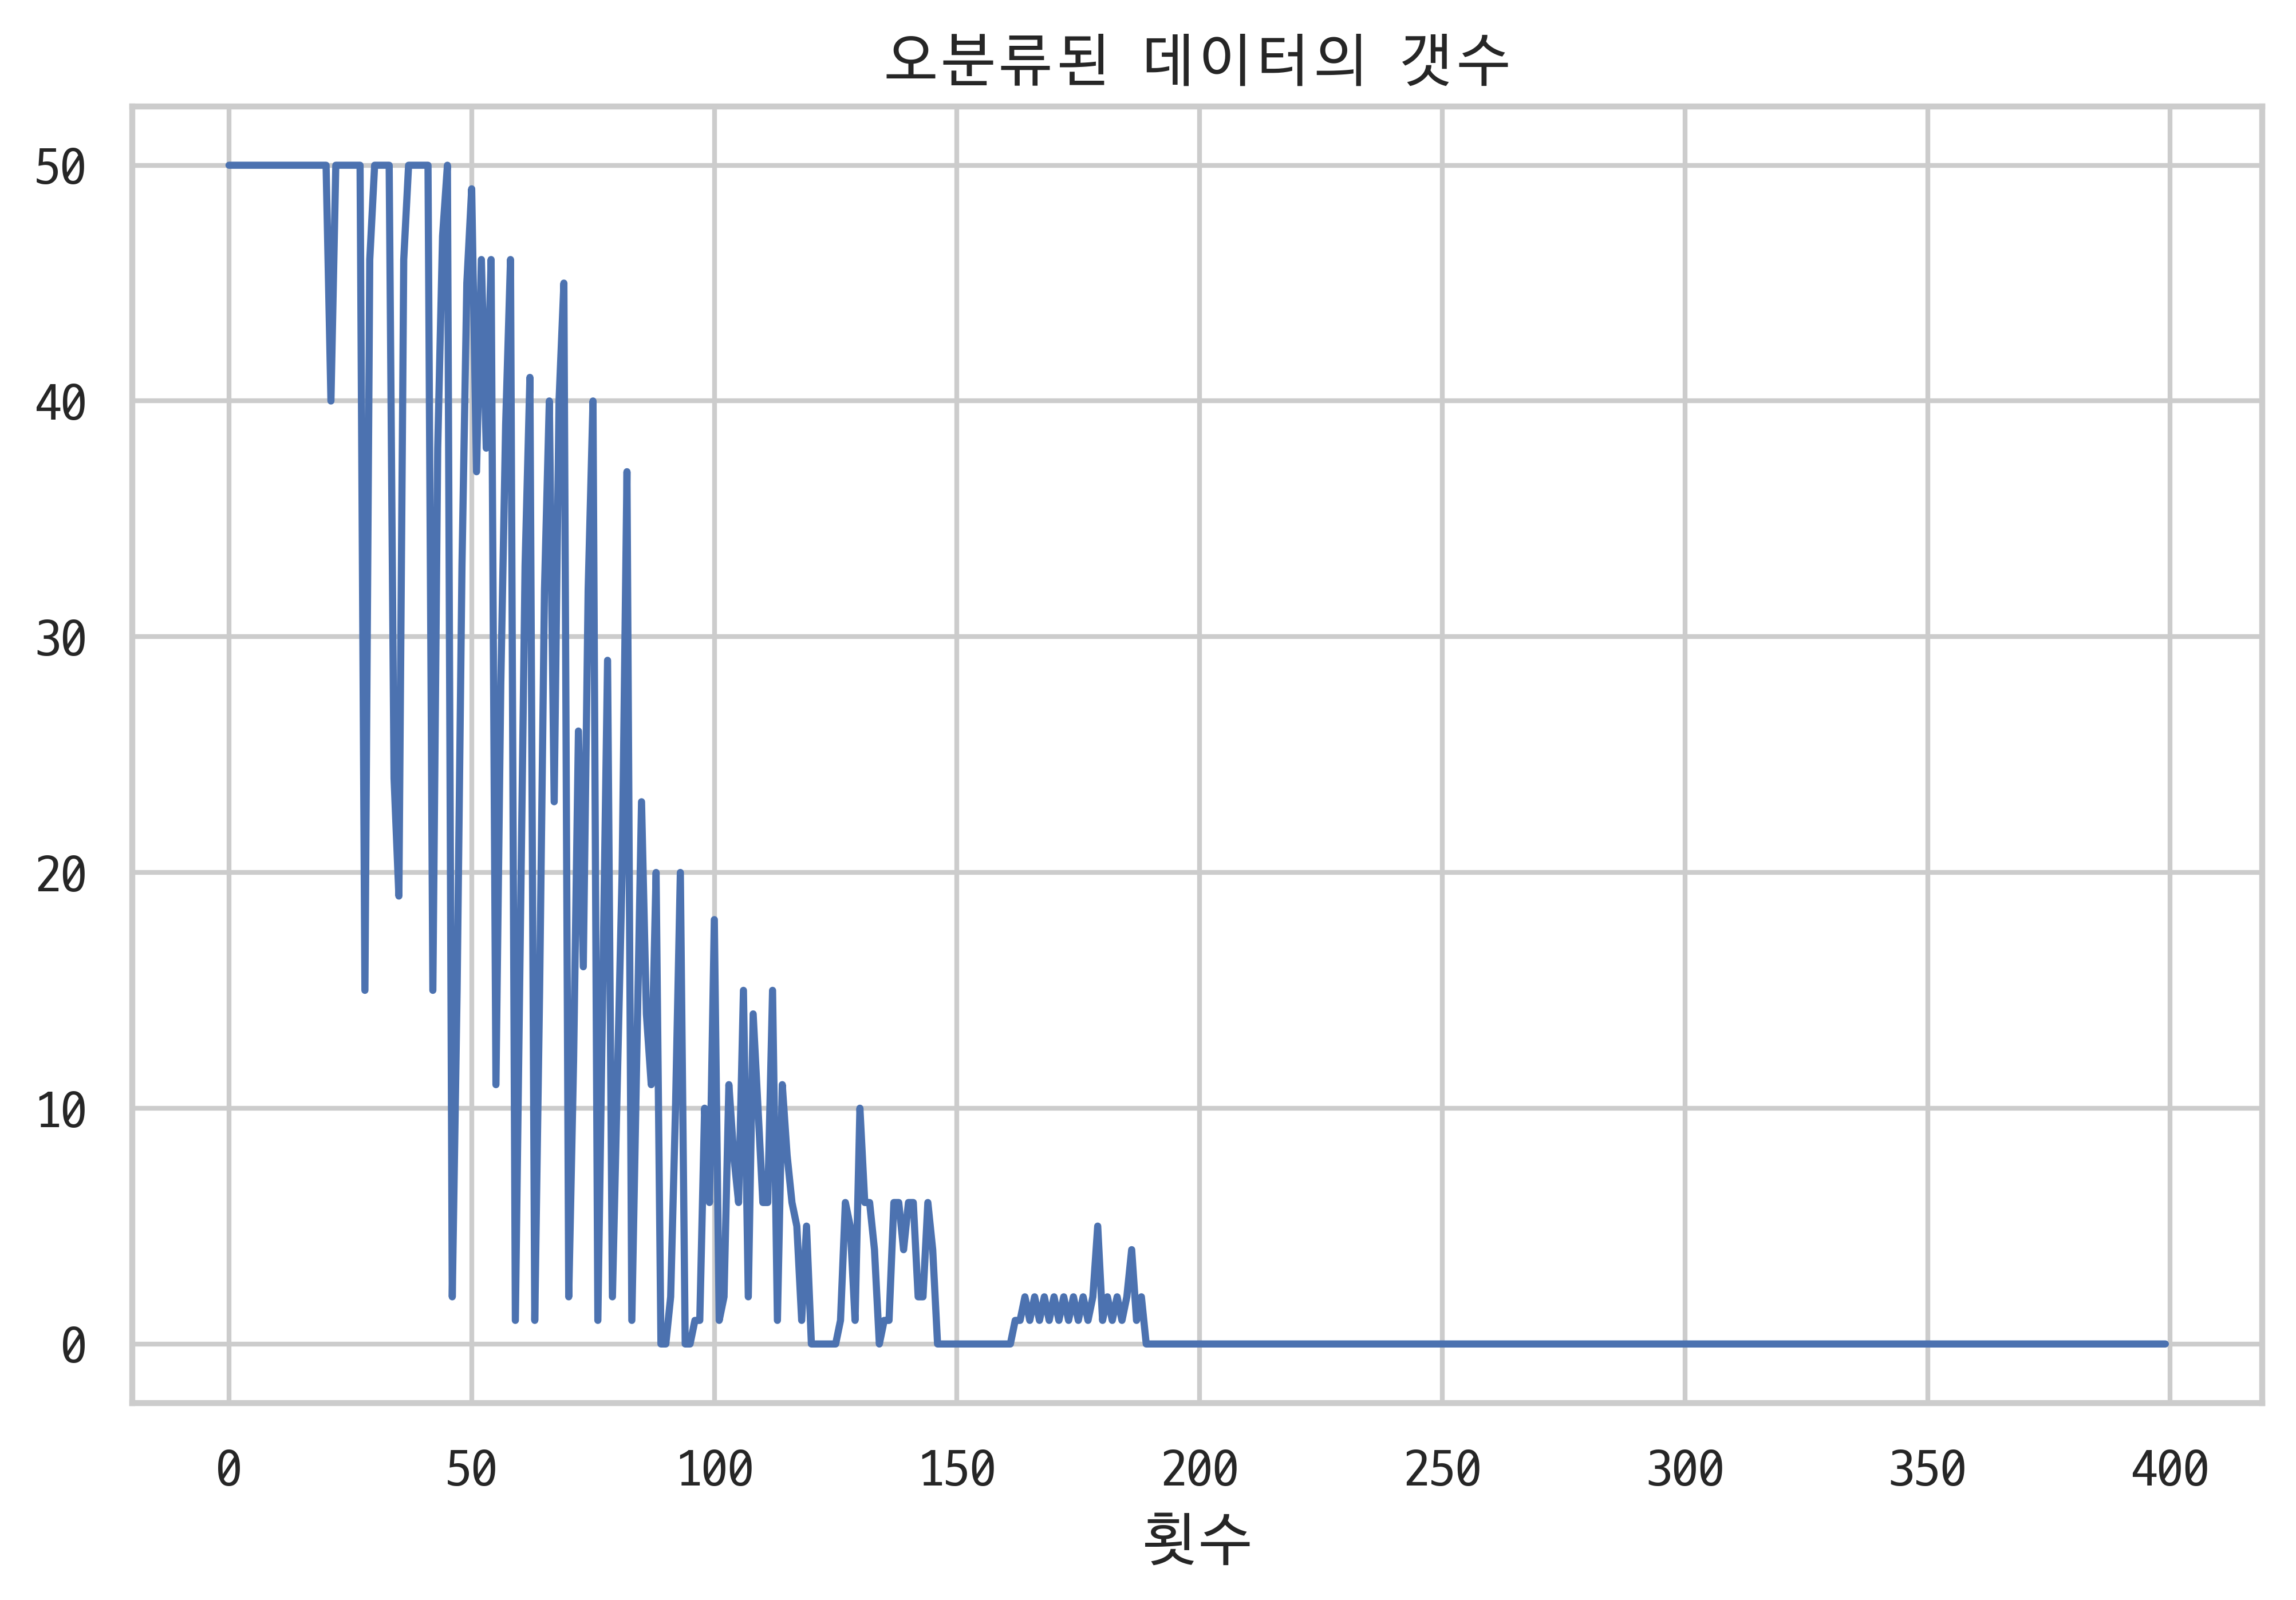

In [11]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss='modified_huber', shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel('횟수')
plt.title('오분류된 데이터의 갯수')
plt.show()